In [1]:
from typing import List, TypedDict
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name:str
    skills:List[str]
    age:str
    result:str

def compliment_node(state: AgentState) -> AgentState:
    """AgentState processing node that adds a compliment to the name."""

    state['result'] = state['name'] + ", welcome to the system!"
    return state

def age_node(state: AgentState) -> AgentState:
    """AgentState processing node that adds a message about the age."""
    state['result'] = state['result'] + f" You are {state['age']} years old!"
    return state

def skills_node(state: AgentState) -> AgentState:
    """AgentState processing node that adds a message about the skills."""
    state['result'] = state['result'] + f" Your skills are: {', '.join(state['skills'])}."
    return state

In [3]:
graph = StateGraph(AgentState)

graph.add_node("compliment_node", compliment_node)
graph.add_node("age_node", age_node)
graph.add_node("skills_node", skills_node)

graph.set_entry_point("compliment_node")
graph.add_edge("compliment_node", "age_node")
graph.add_edge("age_node", "skills_node")
graph.set_finish_point("skills_node")

app = graph.compile()


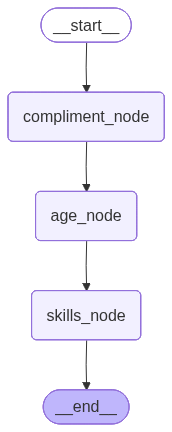

In [4]:
from IPython.display import Image,display

display(Image(app.get_graph().draw_mermaid_png()))


In [5]:
answers = app.invoke({"name": "Linda", "age": 30, "skills": ["Python", "AI"]})

answers['result']

'Linda, welcome to the system! You are 30 years old! Your skills are: Python, AI.'